In [18]:
install.packages("mlbench")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [19]:
adult = read.csv('adult.data.txt')

In [20]:
dim(adult)
levels(adult$X..50K)
head(adult)

[1] 32560    15

[1] " <=50K" " >50K"

X39,State.gov,X77516,Bachelors,X13,Never.married,Adm.clerical,Not.in.family,White,Male,X2174,X0,X40,United.States,X..50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


In [21]:
adult <- na.omit(adult)

In [22]:
summary(adult)

      X39                    State.gov         X77516       
 Min.   :17.00    Private         :22696   Min.   :  12285  
 1st Qu.:28.00    Self-emp-not-inc: 2541   1st Qu.: 117832  
 Median :37.00    Local-gov       : 2093   Median : 178363  
 Mean   :38.58    ?               : 1836   Mean   : 189782  
 3rd Qu.:48.00    State-gov       : 1297   3rd Qu.: 237054  
 Max.   :90.00    Self-emp-inc    : 1116   Max.   :1484705  
                 (Other)          :  981                    
         Bachelors          X13                       Never.married  
  HS-grad     :10501   Min.   : 1.00    Divorced             : 4443  
  Some-college: 7291   1st Qu.: 9.00    Married-AF-spouse    :   23  
  Bachelors   : 5354   Median :10.00    Married-civ-spouse   :14976  
  Masters     : 1723   Mean   :10.08    Married-spouse-absent:  418  
  Assoc-voc   : 1382   3rd Qu.:12.00    Never-married        :10682  
  11th        : 1175   Max.   :16.00    Separated            : 1025  
 (Other)      : 5134  

In [23]:
library(caret)

In [24]:
library(ggplot2)
library(plyr)
library(ROCR)

colnames(adult) <- c('age', 'workclass', 'fnlwgt', 'education', 
                     'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                     'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income')

In [25]:
adult$educatoin <- NULL
adult$fnlwgt <- NULL
adult$relationship <- NULL

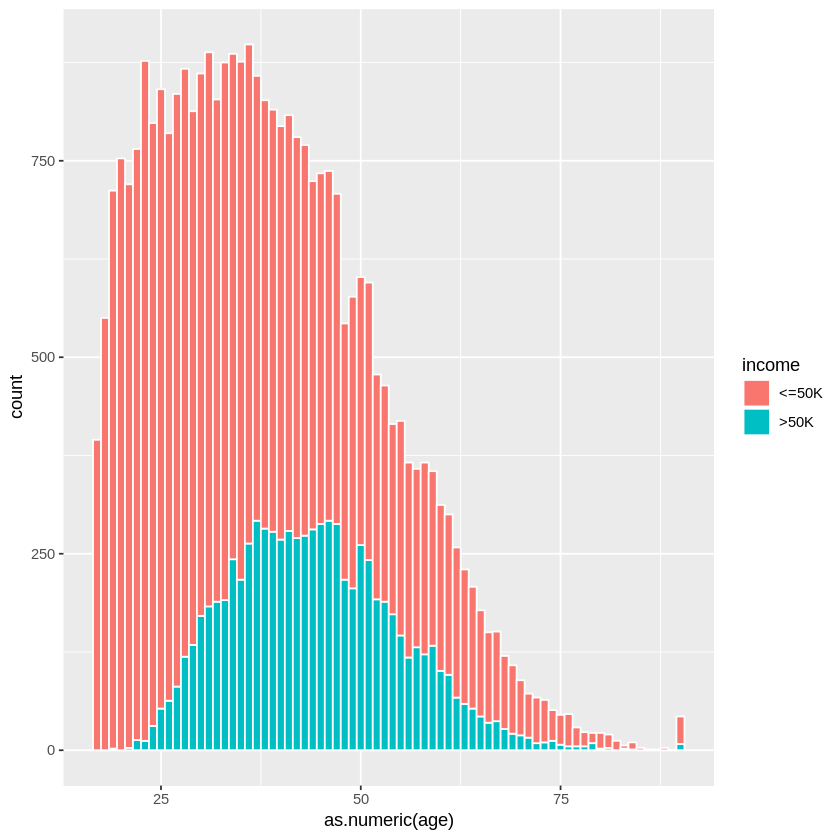

In [26]:
ggplot(adult) + aes(x=as.numeric(age), group=income, fill=income) + 
  geom_histogram(binwidth=1, color='white')

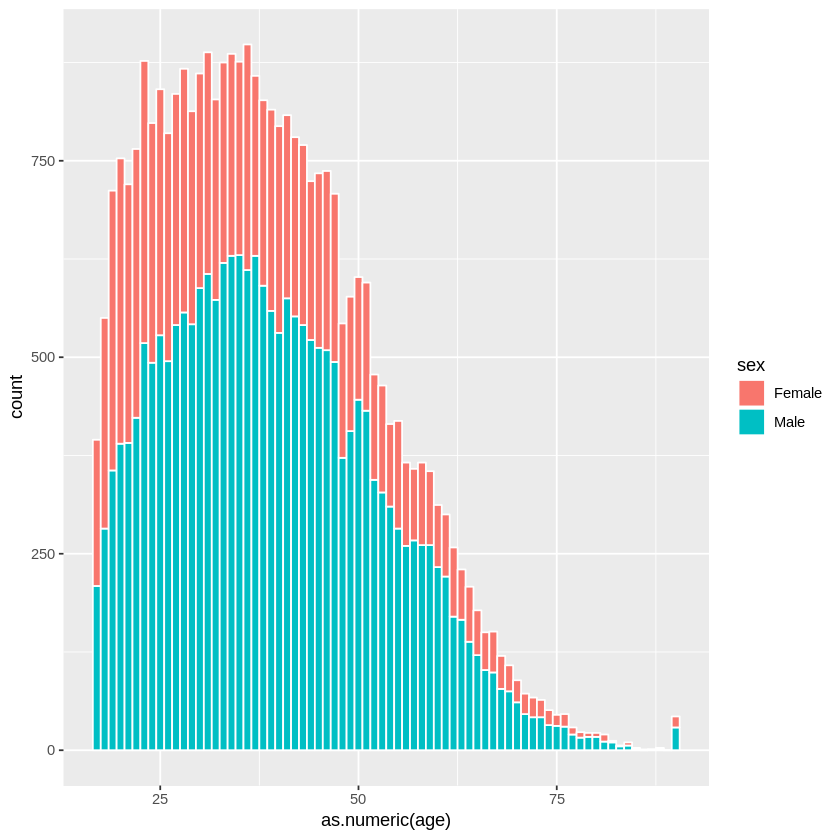

In [43]:
ggplot(adult) + aes(x=as.numeric(age), group=sex, fill=sex) + 
  geom_histogram(binwidth=1, color='white')

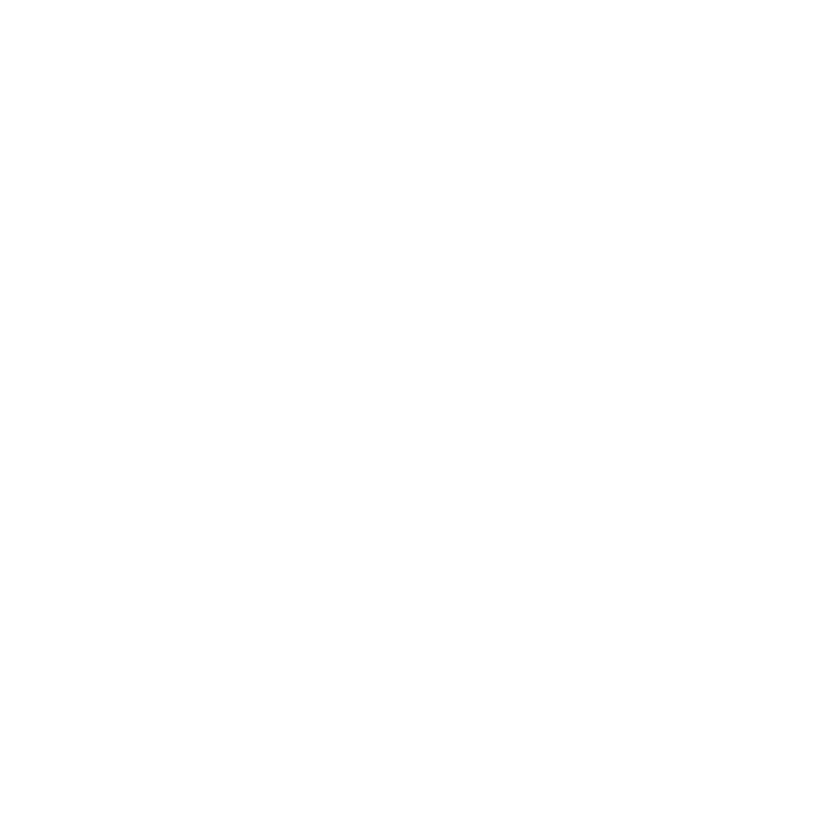

In [28]:
dataframe1 <- data.frame(table(adult$income, adult$education_num))
names(dataframe1) <- c('income', 'education_num', 'count')
dataframe1

income,education_num,count
<=50K,1,51
>50K,1,0
<=50K,2,162
>50K,2,6
<=50K,3,317
>50K,3,16
<=50K,4,606
>50K,4,40
<=50K,5,487
>50K,5,27


In [29]:
dataframe2 <- data.frame(table(adult$income, adult$age))
names(dataframe2) <- c('income', 'age', 'count')
dataframe2 


income,age,count
<=50K,17,395
>50K,17,0
<=50K,18,550
>50K,18,0
<=50K,19,710
>50K,19,2
<=50K,20,753
>50K,20,0
<=50K,21,717
>50K,21,3


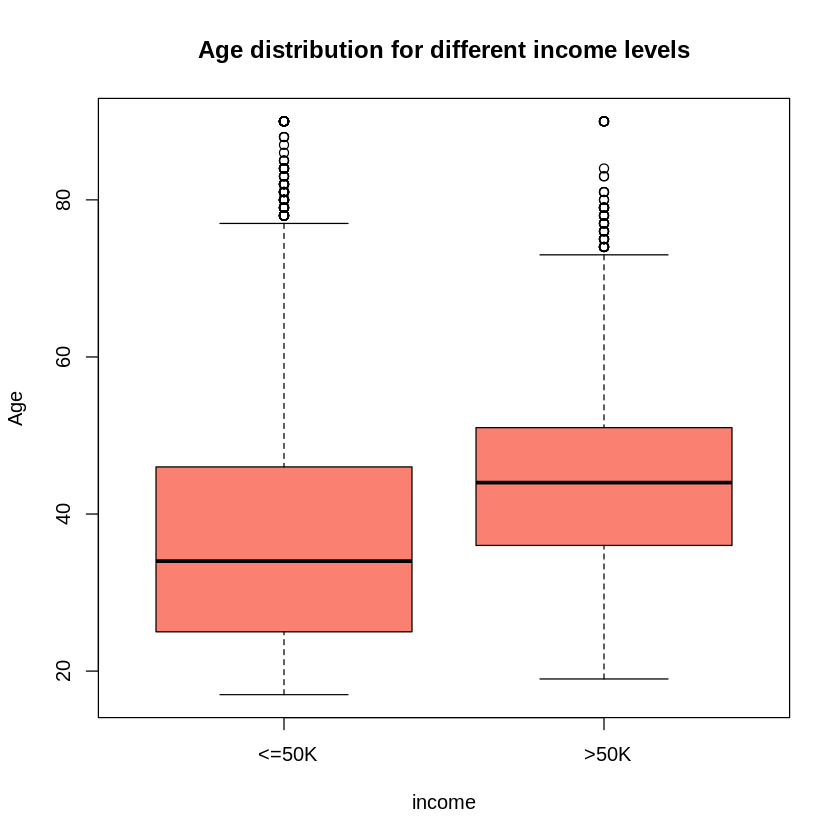

In [30]:

boxplot (age ~ income, data= adult, 
         main= "Age distribution",
         xlab= "income", ylab= "Age", col= "salmon")

In [35]:
size <- round(.66 * dim(adult)[1])  # training set size
training_set <- adult[1:size,]
testing_set <- adult[-(1:size),]

In [36]:
m1 <- glm(income ~ ., data = training_set, family = binomial('logit'))
summary(m1)


Call:
glm(formula = income ~ ., family = binomial("logit"), data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.8935  -0.5077  -0.2105  -0.0430   3.4174  

Coefficients: (1 not defined because of singularities)
                                            Estimate Std. Error z value
(Intercept)                               -9.574e+00  3.886e-01 -24.640
age                                        2.540e-02  1.938e-03  13.109
workclass Federal-gov                      9.963e-01  1.853e-01   5.376
workclass Local-gov                        3.413e-01  1.689e-01   2.020
workclass Never-worked                    -9.526e+00  7.223e+02  -0.013
workclass Private                          5.263e-01  1.509e-01   3.487
workclass Self-emp-inc                     7.510e-01  1.810e-01   4.150
workclass Self-emp-not-inc                 1.422e-01  1.662e-01   0.855
workclass State-gov                        1.967e-01  1.837e-01   1.071
workclass Without-pay       

In [37]:
prob <- predict(m1, testing_set, type = 'response')
pred <- rep('<=50K', length(prob))
pred[prob>=.5] <- '>50K'
# confusion matrix 
tb <- table(pred, testing_set$income)
tb

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

       
pred     <=50K  >50K
  <=50K   7794  1063
  >50K     569  1644

In [39]:
accuracy <- (7794+1644)/(7794+1644+1063+569)
print(accuracy)

[1] 0.8525745


In [49]:
object.size(adult)

1572720 bytes